In [16]:
# Import the course packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import scipy.stats
import seaborn as sns

# Import the course datasets as DataFrames
auto = pd.read_csv("auto.csv")
boston = pd.read_csv("boston.csv")
diabetes = pd.read_csv("diabetes.csv")
gapminder = pd.read_csv("gm_2008_region.csv")
votes = pd.read_csv("votes.csv")
whitewine = pd.read_csv("white-wine.csv")
redwine = pd.read_csv("winequality-red.csv")

# Preview the first DataFrame
auto

,mpg,displ,hp,weight,accel,origin,size
0,18.0,250.0,88,3139,14.5,US,15.0
1,9.0,304.0,193,4732,18.5,US,20.0
2,36.1,91.0,60,1800,16.4,Asia,10.0
3,18.5,250.0,98,3525,19.0,US,15.0
4,34.3,97.0,78,2188,15.8,Europe,10.0
...,...,...,...,...,...,...,...
387,18.0,250.0,88,3021,16.5,US,15.0
388,27.0,151.0,90,2950,17.3,US,10.0
389,29.5,98.0,68,2135,16.6,Asia,10.0
390,17.5,250.0,110,3520,16.4,US,15.0


![](BasicDefinations.png)

**EDA of IRIS dataset**

In [5]:
from sklearn import datasets
plt.style.use('ggplot')

In [6]:
iris=datasets.load_iris()


sklearn.utils._bunch.Bunch

In [12]:
print(type(iris))
print(iris.keys())
print(type(iris.data))
print(type(iris.keys))
print(iris.data.shape)
print(iris.target_names)

<class 'sklearn.utils._bunch.Bunch'>
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
<class 'numpy.ndarray'>
<class 'builtin_function_or_method'>
(150, 4)
['setosa' 'versicolor' 'virginica']


In [13]:
x=iris.data
y=iris.target
df=pd.DataFrame(x,columns=iris.feature_names)
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


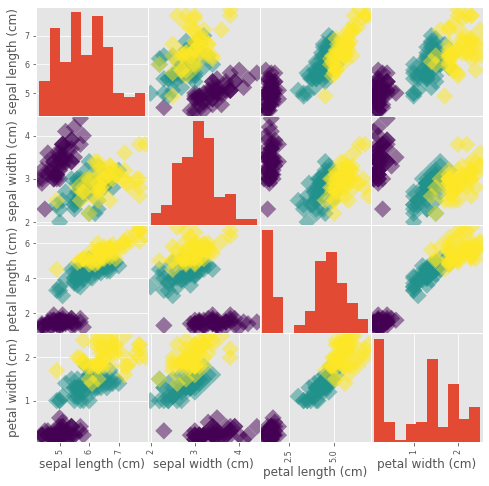

In [15]:
_ = pd.plotting.scatter_matrix(df, c = y, figsize = [8, 8], s=150, marker = 'D')

**Basic EDA of votes dataset**

In [18]:
votes.head()

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [19]:
votes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   party              435 non-null    object
 1   infants            435 non-null    object
 2   water              435 non-null    object
 3   budget             435 non-null    object
 4   physician          435 non-null    object
 5   salvador           435 non-null    object
 6   religious          435 non-null    object
 7   satellite          435 non-null    object
 8   aid                435 non-null    object
 9   missile            435 non-null    object
 10  immigration        435 non-null    object
 11  synfuels           435 non-null    object
 12  education          435 non-null    object
 13  superfund          435 non-null    object
 14  crime              435 non-null    object
 15  duty_free_exports  435 non-null    object
 16  eaa_rsa            435 non-null    object
dt

In [20]:
votes.describe()

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
count,435,435,435,435,435,435,435,435,435,435,435,435,435,435,435,435,435
unique,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
top,democrat,n,y,y,n,y,y,y,y,y,y,n,n,y,y,n,y
freq,267,236,195,253,247,212,272,239,242,207,216,264,233,209,248,233,269


In [21]:
votes.shape

(435, 17)

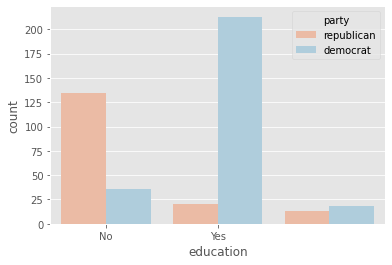

In [25]:
plt.figure()
sns.countplot(x='education', hue='party', data=votes, palette='RdBu')
plt.xticks([0,1],['No','Yes'])
plt.show()

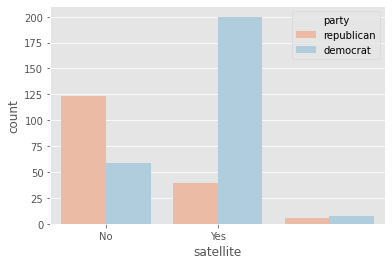

In [26]:
plt.figure()
sns.countplot(x='satellite', hue='party', data=votes, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

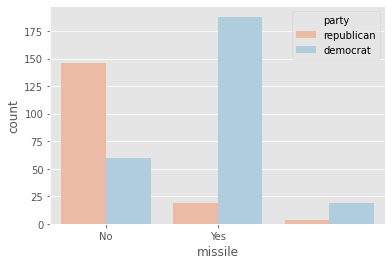

In [27]:
plt.figure()
sns.countplot(x='missile', hue='party', data=votes, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

**Using scikit-learn to fit classifier for IRIS data to fit a classifier**

In [28]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=6)
knn.fit(iris['data'],iris['target'])

KNeighborsClassifier(n_neighbors=6)

In [29]:
print(iris['data'].shape)
print(iris['target'].shape)

(150, 4)
(150,)


**Predicting on unlabeled data**

In [30]:
X_new = np.array([[5.6, 2.8, 3.9, 1.1],
[5.7, 2.6, 3.8, 1.3],
[4.7, 3.2, 1.3, 0.2]])

prediction = knn.predict(X_new)
X_new.shape

(3, 4)

In [31]:
print('Prediction: {}'.format(prediction))

Prediction: [1 1 0]


Here above it predicts one which relates to 'versicolor' for first two observation & 0 which relates to 'setosa' for the third observation as show below

In [33]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


**k-Nearest Neighbors: Fit**

Now that you have explored the Congressional voting records dataset, it is time to build your first classifier. You will fit a k-Nearest Neighbors classifier to the voting dataset, which has once again been loaded into a DataFrame.

Hugo discussed the importance of making sure your data conforms to the scikit-learn API format. It is necessary to place the features in an array where each column represents a feature and each row represents an observation or data point - in this case, a Congressman's voting record. The target column must have the same number of observations as the feature data. This exercise has done this for you. Notice we named the feature array X and response variable y: This is in accordance with the common scikit-learn practice.

By specifying the n_neighbors parameter, you need to create a k-NN classifier with 6 neighbors and then fit it to the data

In [38]:
#Here I need to load tranformed / cleaned data for votes which replace 'n' with 0 and 'y' with 1
df_votes = pd.read_csv("votes-ch1.csv")
# Create arrays for the features and the response variable
y = df_votes['party'].values
X = df_votes.drop('party', axis=1).values

# Create a k-NN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(X,y)

KNeighborsClassifier(n_neighbors=6)

Now that as above shows our k-NN classifier with 6 neighbors has been fit to the data, it can be used to predict the labels of new data points.

**Predict k-nearest neighbors**

Once we have fitted a k-NN classifier, we can use it to predict a new data point's label. Due to the fact that all the data was used to fit the model, there are no unlabeled data available! In some cases, we can still use the .predict() method on the X that was used to fit the model, but it is not a good indicator of the model's ability to generalize to new data sets.

Hugo will discuss a solution to this problem in the next video. For now, an unlabeled random data point has been generated and is available to you as X_new. As well as using the training data X, we will use your classifier to predict the label for this new data point. If you use .predict() on X_new, we will generate one prediction, but if you we it on X, we will generate 435 predictions: one for each sample.

The DataFrame has been pre-loaded as df. You will create the feature array X and target variable array Y yourself this time. DataFrame df has been pre-loaded with the data.

In [41]:
X_new = pd.DataFrame((np.random.rand(1,16)))

# Predict the labels for the training data X
y_pred = knn.predict(X)

# Predict and print the label for the new data point X_new
new_prediction = knn.predict(X_new)
print("Prediction: {}".format(new_prediction))

Prediction: ['democrat']


Our model predict 'democrat' or 'republican'? How sure can you be of its predictions? In other words, how can you measure its performance? This is what you will learn in below

**The digits recognition dataset**

Up until now, you have been performing binary classification, since the target variable had two possible outcomes. Hugo, however, got to perform multi-class classification in the videos, where the target variable could take on three possible outcomes. Why does he get to have all the fun?! In the following exercises, you'll be working with the [MNIST](http://yann.lecun.com/exdb/mnist/) digits recognition dataset, which has 10 classes, the digits 0 through 9! A reduced version of the MNIST dataset is one of scikit-learn's included datasets, and that is the one we will use in this exercise.

Each sample in this scikit-learn dataset is an 8x8 image representing a handwritten digit. Each pixel is represented by an integer in the range 0 to 16, indicating varying levels of black. Recall that scikit-learn's built-in datasets are of type Bunch, which are dictionary-like objects. Helpfully for the MNIST dataset, scikit-learn provides an 'images' key in addition to the 'data' and 'target' keys that you have seen with the Iris data. Because it is a 2D array of the images corresponding to each sample, this 'images' key is useful for visualizing the images, as you'll see in this exercise (for more on plotting 2D arrays, see [Chapter 2](https://www.datacamp.com/courses/introduction-to-data-visualization-with-python) of DataCamp's course on Data Visualization with Python). On the other hand, the 'data' key contains the feature array - that is, the images as a flattened array of 64 pixels.

Notice that you can access the keys of these Bunch objects in two different ways: By using the . notation, as in digits.images, or the [] notation, as in digits['images'].

For more on the MNIST data, check out [this exercise](https://campus.datacamp.com/courses/importing-data-in-python-part-1/introduction-and-flat-files-1?ex=10) in Part 1 of DataCamp's Importing Data in Python course. There, the full version of the MNIST dataset is used, in which the images are 28x28. It is a famous dataset in machine learning and computer vision, and frequently used as a benchmark to evaluate the performance of a new model.

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are di

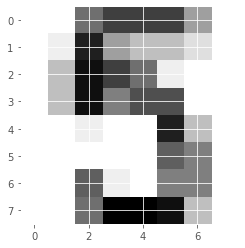

In [43]:
# Import necessary modules
from sklearn import datasets
import matplotlib.pyplot as plt

# Load the digits dataset: digits
digits = datasets.load_digits()

# Print the keys and DESCR of the dataset
print(digits.keys())
print(digits['DESCR'])

# Print the shape of the images and data keys
print(digits.images.shape)
print(digits.data.shape)

# Display digit 1010
plt.imshow(digits.images[1010], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

Above It looks like the image in question corresponds to the digit '5'. Now, can we build a classifier that can make this prediction not only for this image, but for all the other ones in the dataset? we'll do so in the next exercise!

**Train/Test Split + Fit/Predict/Accuracy**


Now that we know why it's important to separate your data into training and test sets, let's practice on the digits dataset! Arrays for the features and target variable will be divided into training and test sets, and a k-NN classifier will be fitted to the training data and its accuracy will be calculated using .score().

In [45]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Create feature and target arrays
X = digits.data
y = digits.target

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=7)

# Fit the classifier to the training data
knn.fit(X_train,y_train)

# Print the accuracy
print(knn.score(X_test, y_test))

0.9833333333333333


Incredibly, this out of the box k-NN classifier with 7 neighbors has learned from the training data and predicted the labels of the images in the test set with 98% accuracy, and it did so in less than a second! This is one illustration of how incredibly useful machine learning techniques can be

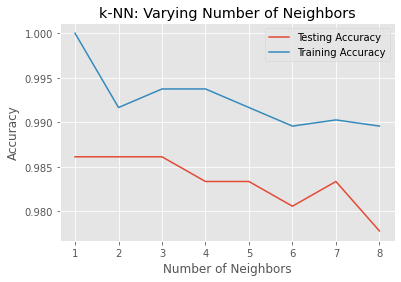

In [46]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train,y_train)

    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train,y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()


It looks like the test accuracy is highest when using 3 and 5 neighbors. Using 8 neighbors or more seems to result in a simple model that underfits the data